<a href="https://colab.research.google.com/github/openingsound/Hands-On_Machine_Learning/blob/master/cifar_10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import keras

from keras.datasets import cifar10
from keras.models  import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


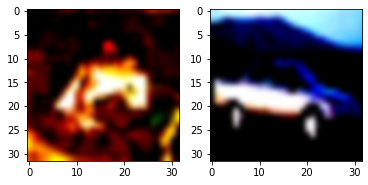

In [12]:
plt.subplot(121)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(122)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)

plt.show()

In [ ]:
print("mean : ",np.mean(X_train))
print("std : ",np.std(X_train))

mean = [0,0,0]
std = [0,0,0]
X_train_nom = np.ones(X_train.shape)
X_test_nom = np.ones(X_test.shape)

mean :  120.70756512369792
std :  64.1500758911213


In [ ]:
for i in range(3):
  mean[i] = np.mean(X_train[:,:,:,i]) # rgb돌면서 평균값 찾기 
  std[i] = np.std(X_train[:,:,:,i])

# 구한 mean과 std로 정규화 해주기
  # 평균 빼고 std로 나누기
for i in range(3):
  X_train_nom[:,:,:,i] = (X_train[:,:,:,i]-mean[i])/std[i]
  X_test_nom[:,:,:,i] = (X_test[:,:,:,i]-mean[i])/std[i]


In [ ]:
X_train = X_train_nom
X_test = X_test_nom

In [ ]:
print(X_train.mean(),X_test.mean())
print(X_train.std(),X_test.std()) # 정규화 완료

4.91799193961621e-17 0.012809767333157673
0.9999999999999996 0.9986833579038662


In [ ]:
batchSize = 64
num_classes = 10
num_epochs = 50
learningRate = 0.001
lr_weight_decay = 0.95

img_rows = 32
img_cols = 32

In [ ]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
Y_train = np_utils.to_categorical(y_train,num_classes)
Y_test = np_utils.to_categorical(y_test,num_classes)
print(Y_train,Y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [30]:
from keras import initializers
import copy  # 복사용
results = {}
y = {}
loss = []
acc = []

dropout = 0.4

print ("Dropout: ", (dropout))
model = Sequential()

#-- layer 1
model.add(Conv2D(64, 3, 3,
                        padding='same',
                        input_shape=(img_rows, img_cols,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(Conv2D(64, 3, 3, activation='relu',padding='same'))
model.add(keras.layers.BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout))                                        

##--layer 2
model.add(Conv2D(128, 3, 3, activation='relu',padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

##--layer 3                         
model.add(Conv2D(256, 3, 3, activation='relu',padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(dropout)) 

##-- layer 4
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(dropout))                                        

#-- layer 5
model.add(Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(dropout))                                        

#-- layer 6
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model_cce = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs, verbose=1, shuffle=True, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
y[dropout] = model.predict(X_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])
loss.append(score[0])
acc.append(score[1])

Dropout:  0.4
Epoch 1/50
782/782 [==============================] - 5s 7ms/step - loss: 2.3323 - accuracy: 0.2446 - val_loss: 1.6876 - val_accuracy: 0.3805
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 1.8618 - accuracy: 0.3237 - val_loss: 1.5922 - val_accuracy: 0.4121
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 1.7282 - accuracy: 0.3635 - val_loss: 1.5473 - val_accuracy: 0.4287
Epoch 4/50
782/782 [==============================] - 5s 6ms/step - loss: 1.6593 - accuracy: 0.3894 - val_loss: 1.4840 - val_accuracy: 0.4480
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 1.6179 - accuracy: 0.4072 - val_loss: 1.4511 - val_accuracy: 0.4655
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 1.5872 - accuracy: 0.4166 - val_loss: 1.4386 - val_accuracy: 0.4747
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 1.5556 - accuracy: 0.4293 - val_loss: 1.4030 - val_accuracy:

#test 결과
*  dropout 0.2 
  * Test score: 1.2110393047332764
  * Test accuracy: 0.5910000205039978

*  dropout 0.4
  * 위와 비슷하게 나옴

## batch normalization 추가
  * dropout 0.4
    * Test score: 1.0468358993530273
    * Test accuracy: 0.6251000165939331

